# Análise exploratória de dados

## Resumo

Neste notebook temos a intenção de mostrar como foi feita a análise exploratória do *Dataset* de performace acadêmica estudantil. Primeiramente, foi feita a descrição dos dados, onde pesquisamos informaçõs como quantidade de linhas, colunas, ver se havia dados faltantes etc,  e feito o dicionário do *Dataframe*. Após isso, desenvolvemos gráficos para nos dar *Insights* sobre as perguntas iniciais que fizemos sobre nossos dados.

## Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import patches
from IPython.display import Markdown
import numpy as np

## 1. Descrição dos dados

In [2]:
dict_path = Path("../data/external/dicionario.csv")
df_dict = pd.read_csv(dict_path)
df_dict

,variavel,significado,valores,tipo
0,gender,Gênero do estudante,"[""Male"", ""Female""]",Nomial
1,NationallTy,Nacionalidade do estudante,"[""Kuwait"", ""Lebanon"", ""Egypt"", ""SaudiArabia"", ...",Nomial
2,PlaceofBirth,Local de nascimento do estudante,"[""Kuwait"", ""Lebanon"", ""Egypt"", ""SaudiArabia"", ...",Nomial
3,StageID,Nivel educacional do estudante,"[""lowerlevel"", ""MiddleSchool"", ""HighSchool""]",Ordinal
4,GradeID,Turma a qual o aluno pertence,"[""G-01"", ""G-02"", ""G-03"", ""G-04"", ""G-05"", ""G-06...",Nomial
5,SectionID,Sala de aula a qual o aluno pertence,"[""A"", ""B"", ""C""]",Nomial
6,Topic,Topico do curso,"[""English"", ""Spanish"", ""French"", ""Arabic"", ""IT...",Nomial
7,Semester,Semestre letivo,"[""First"", ""Second""]",Ordinal
8,Relation,Parente responsavel pelo estudante,"[""Mom"", ""Father""]",Nomial
9,raisedhands,Quantas vezes o estudante levanta sua mão na s...,[0 - 100],Discreta


In [3]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
display(df.shape)
display(Markdown(f"O conjunto de dados possui **{df.shape[0]}** linhas e **{df.shape[1]}** colunas"))

(480, 17)

O conjunto de dados possui **480** linhas e **17** colunas

In [5]:
display(df.info())
display(Markdown("Não há dados faltantes no dataset"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

None

Não há dados faltantes no dataset

## 2. Perguntas de partida e hipóteses

Neste capítulo é feito a visualização dos dados onde buscamos identificar possíveis relações existes entre as variáveis que possam explicar o desempenho dos alunos

### 2.1 Análise univariada

Nesta é feito uma avaliação das variáveis de forma isolada com o intuito de visualizar como as mesmas estão dispostas no dataset.

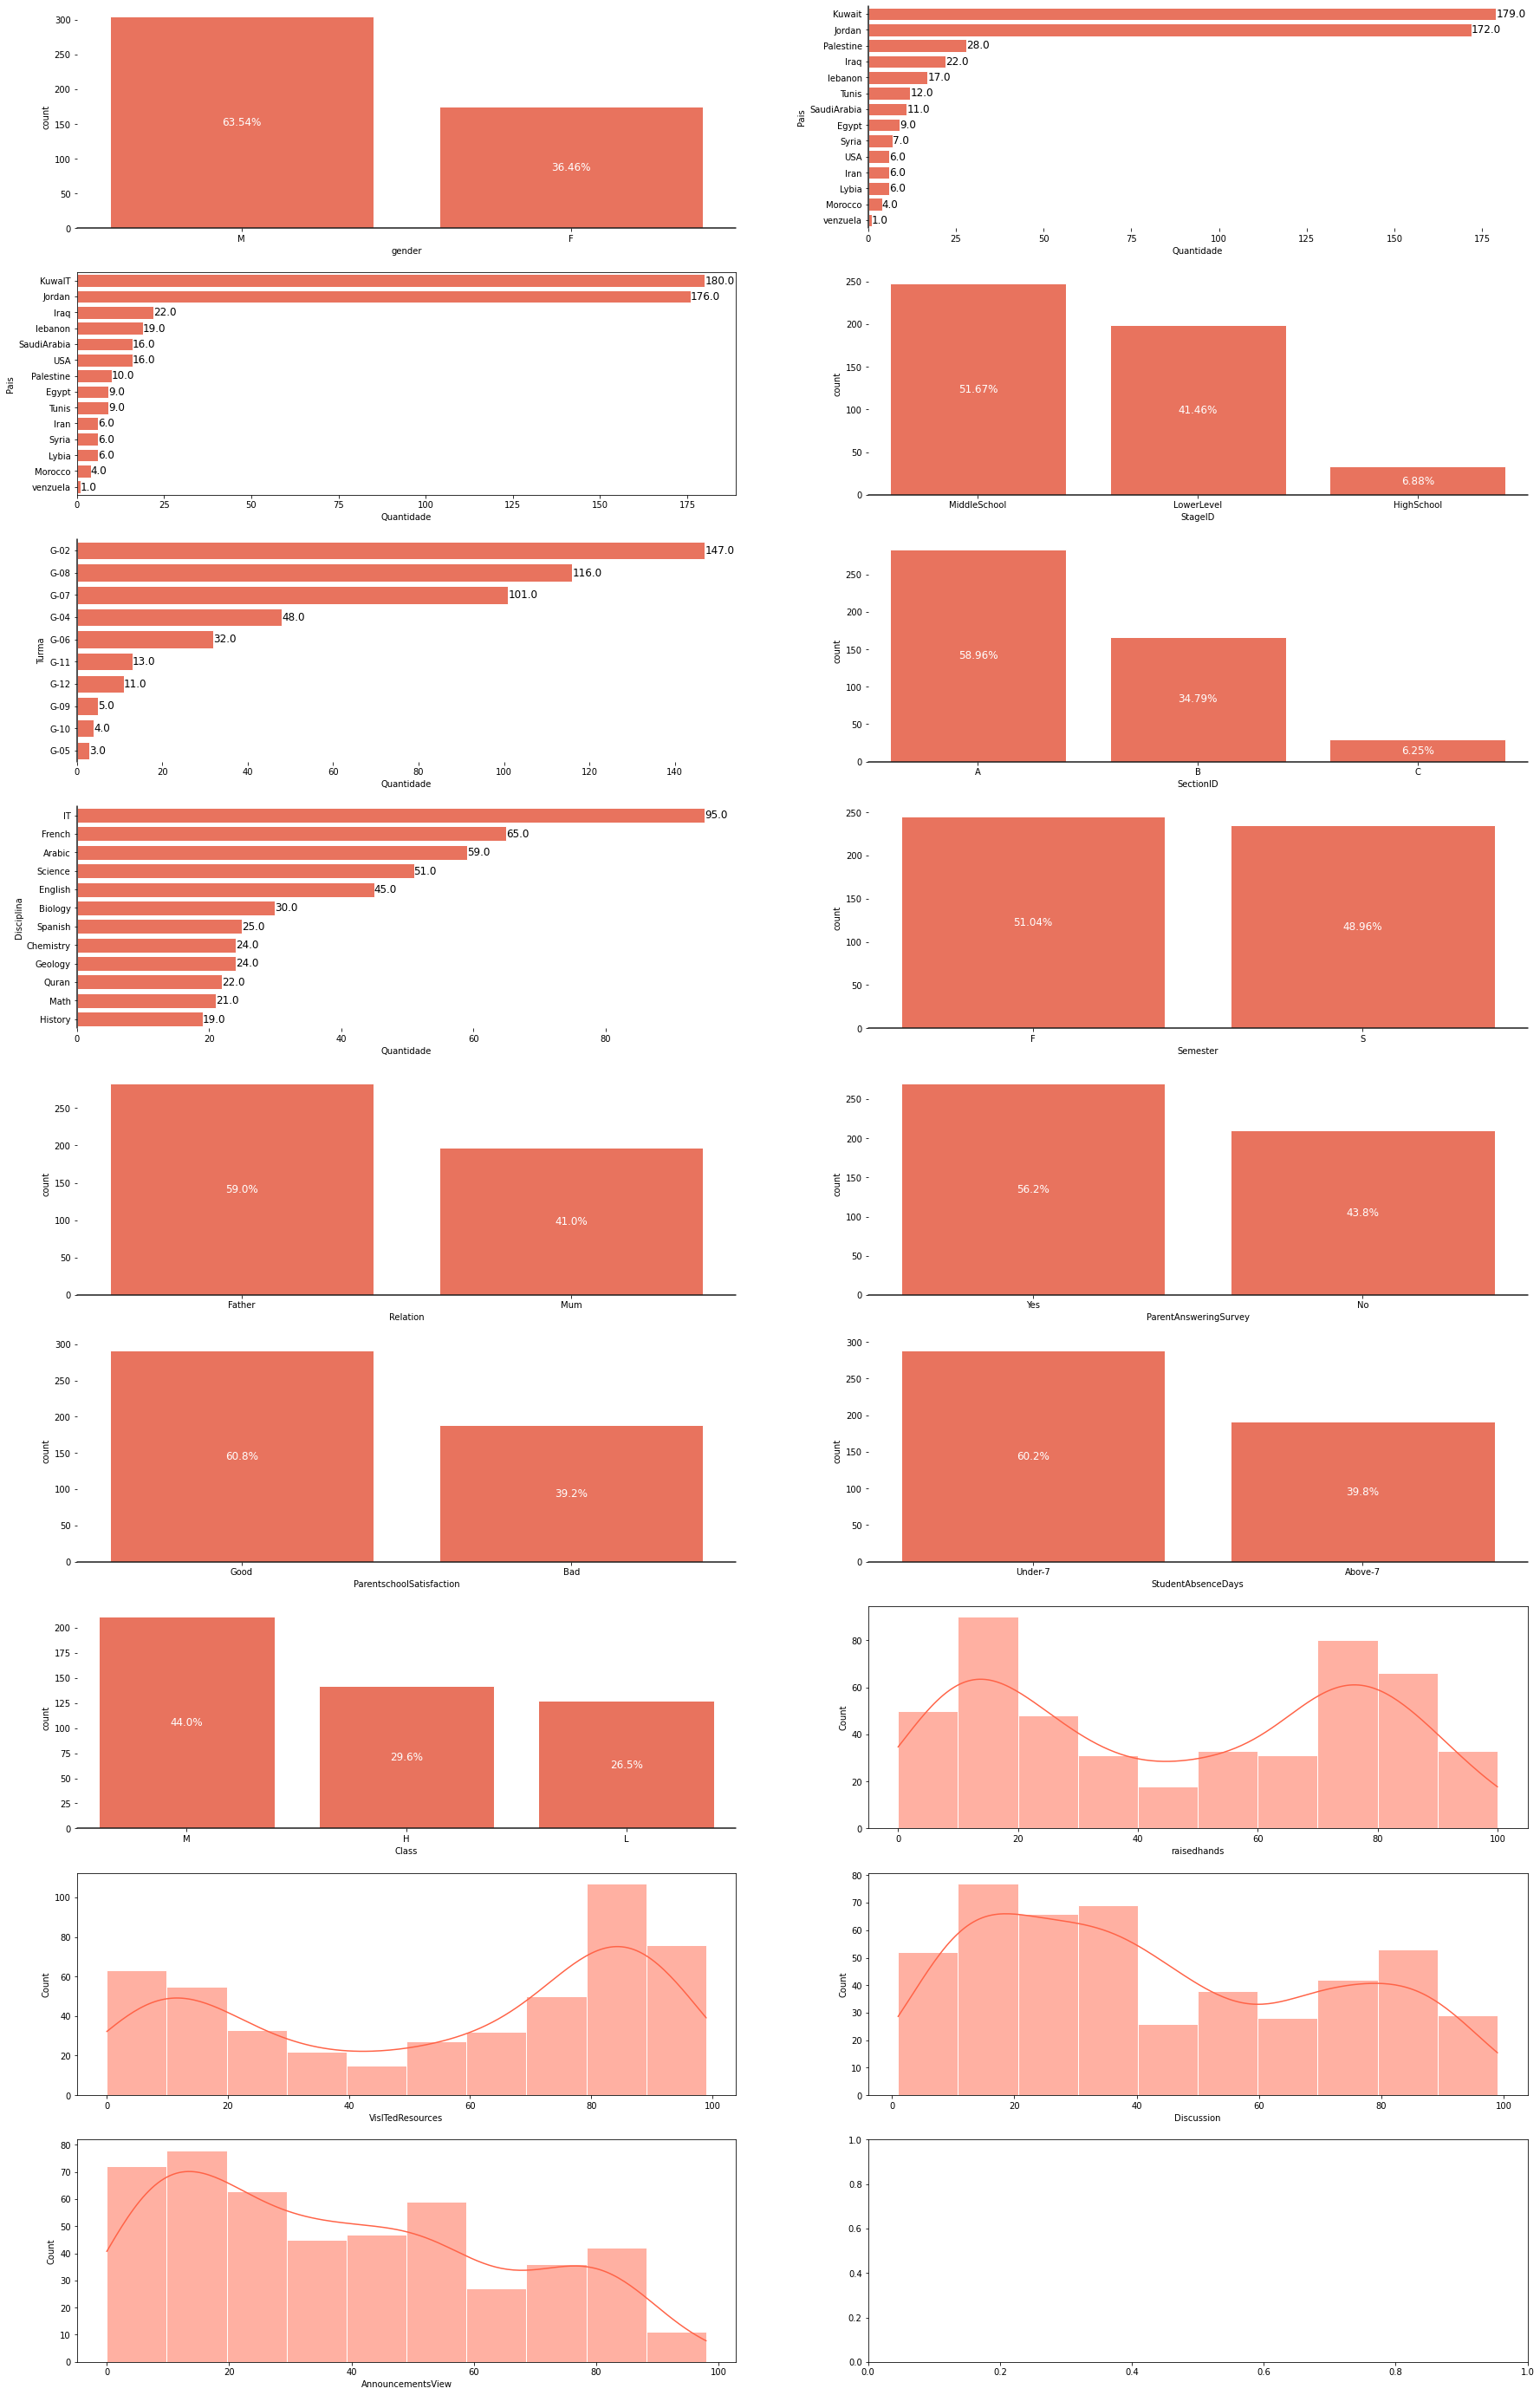

O conjunto de dados e composto por **63.54%** de pessoas do sexo masculino e **36.46%** de pessoas do sexo feminino.

A maior parte das pessoas que responderam a pesquisa possuem nacionalidade do **Kuwait** ou **Jordan**.

**74.2%** dos participantes da pesquisa tem origem no **KuwaIT** ou **Jordan**.

De acordo com o nível de escolaridade os estudantes estão distribuidos em **41.46%** como Lower Level, **51.67%** como Middle School e **6.88%** como High School.

As turmas com a maior quantidade de alunos são a **G-02** com **147** alunos, a **G-08** com **116** alunos e a **G-07** com **101** alunos.

A maior parte dos alunos estão estudam na sala A.

A turma com maior quantidade de alunos é a de **IT**.

O semestre letivo até então é a variável com melhor balanceamento, havendo uma diferença de **2.1%** na distruição dos participantes da pesquisa.

**59.0%** dos participantes da pesquisa tem como responável **Pai** e **41.0%** dos participantes da pesquisa tem como responável **Mãe**.

Apenas **56.2%** dos responsáveis responderam a pesquisa

**60.8%** estão satisfeitos com a escola.

**39.8%** dos alunos possuem mais de 7 faltas.

Os alunos foram classificados como **26.5%** no Low-Level, **44.0%** no Middle-Level e **29.6%** no High-Level

In [6]:
fig, axes  = plt.subplots(9,2,figsize=(30,50))
sns.set(style="whitegrid")
total = float(len(df))
df.NationalITy = df.NationalITy.replace(['KW'],'Kuwait')
df.StageID = df.StageID.replace(["lowerlevel"],"LowerLevel")
# gender

ax = sns.countplot(
    x="gender", 
    data=df, 
    color='tomato',
    ax=axes[0,0])
#plt.xlabel('Gênero')
#plt.ylabel('Quantidade')
#plt.title('Distribuição dos dados por gênero', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0,
           color="k",
           clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.2f}%" for value in df.gender.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# nacionalidade

graph_df1 = (
    df
    .NationalITy
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Pais", "NationalITy": "Quantidade"})
)
ax = sns.barplot(x="Quantidade", y="Pais", data=graph_df1, color='tomato',ax=axes[0,1])
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)

# País de origem

graph_df2 = (
    df
    .PlaceofBirth
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Pais", "PlaceofBirth": "Quantidade"})
)
ax = sns.barplot(x="Quantidade", y="Pais", data=graph_df2, color='tomato',ax=axes[1,0])
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)

# Stage ID

ax = sns.countplot(x="StageID", data=df, color='tomato',order=['MiddleSchool','LowerLevel','HighSchool'],ax=axes[1,1])
#plt.xlabel('Nível de escolaridade')
#plt.ylabel('Quantidade')
#plt.title('Distribuição dos dados por nível de escolaridade', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.2f}%" for value in df.StageID.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# Grade ID

graph_df3 = (
    df
    .GradeID
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Turma", "GradeID": "Quantidade"})
)
ax = sns.barplot(x="Quantidade", y="Turma", data=graph_df3, color='tomato',ax=axes[2,0])
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
#plt.xlabel('Quantidade')
#plt.ylabel('Turmas')

#plt.title('Distribuição dos alunos por turma', fontsize=12)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)

# Sectio id

ax = sns.countplot(x="SectionID", data=df, color='tomato',ax=axes[2,1])
#plt.xlabel('Sala')
#plt.ylabel('Quantidade')
#plt.title('Distribuição dos alunos nas salas de aula', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.2f}%" for value in df.SectionID.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# Disciplina

graph_df4 = (
    df
    .Topic
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Disciplina", "Topic": "Quantidade"})
)
ax = sns.barplot(x="Quantidade", y="Disciplina", data=graph_df4, color='tomato',ax=axes[3,0])
#plt.xlabel('Quantidade')
#plt.ylabel('Disciplina')
#plt.title('Distribuição dos alunos por disciplina', fontsize=12)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)

# Semestre

ax = sns.countplot(x="Semester", data=df, color='tomato',ax=axes[3,1])
#plt.xlabel('Semestre')
#plt.ylabel('Quantidade')
#plt.title('Distribuição dos alunos por semestre', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.2f}%" for value in df.Semester.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# Responsável

graph_df5 = (
    df
    .Relation
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "Responsavel", "Relation": "Quantidade"})
)
graph_df5.Responsavel = graph_df5.Responsavel.replace(['Father','Mum'],['Pai','Mãe'])
ax = sns.countplot(x="Relation", data=df, color='tomato',ax=axes[4,0])
#plt.xlabel('Responsável legal')
#plt.ylabel('Quantidade')
#plt.title('Distribuição dos responsáveis legais dos alunos', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.1f}%" for value in df.Relation.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# resposta

ax = sns.countplot(x="ParentAnsweringSurvey", data=df, color='tomato',ax=axes[4,1])
#plt.xlabel('Respondido pelo responsável')
#plt.ylabel('Quantidade')
#plt.title('Responsáveis que responderam a pesquisa', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.1f}%" for value in df.ParentAnsweringSurvey.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# Satisfação

ax = sns.countplot(x="ParentschoolSatisfaction", data=df, color='tomato',ax=axes[5,0])
#plt.xlabel('Satisfação')
#plt.ylabel('Quantidade')
#plt.title('Distribuição da satisfação com a escola', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.1f}%" for value in df.ParentschoolSatisfaction.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# Abstinência

ax = sns.countplot(x="StudentAbsenceDays", data=df, color='tomato',ax=axes[5,1])
#plt.xlabel('Abstinência')
#plt.ylabel('Quantidade')
#plt.title('Distribuição da satisfação dos pais com a escola', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.1f}%" for value in df.StudentAbsenceDays.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

# classificação

ax = sns.countplot(x="Class", data=df, color='tomato',order=['M','H','L'],ax=axes[6,0])
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
ax.bar_label(
    ax.containers[0],
    labels=[f"{value:.1f}%" for value in df.Class.value_counts().to_numpy()/total*100],
    label_type="center",
    color="white"
)

ax = sns.histplot(
    x="raisedhands",
    data=df,
    color='tomato',
    kde=True,
    ax=axes[6,1]
)

ax = sns.histplot(
    x="VisITedResources",
    data=df,
    color='tomato',
    kde=True,
    ax=axes[7,0]
)

ax = sns.histplot(
    x="Discussion",
    data=df,
    color='tomato',
    kde=True,
    ax=axes[7,1]
)

ax = sns.histplot(
    x="AnnouncementsView",
    data=df,
    color='tomato',
    kde=True,
    ax=axes[8,0]
)

plt.show()

masculino = df.gender.value_counts().to_dict()['M']
feminino = df.gender.value_counts().to_dict()['F']
primeiro = df.PlaceofBirth.value_counts().to_list()[0]
segundo = df.PlaceofBirth.value_counts().to_list()[1]
form_stage_1 = df.StageID.value_counts().to_list()[0]
form_stage_2 = df.StageID.value_counts().to_list()[1]
form_stage_3 = df.StageID.value_counts().to_list()[2]
num_turma_1 = df.GradeID.value_counts().to_list()[0]
num_turma_2 = df.GradeID.value_counts().to_list()[1]
num_turma_3 = df.GradeID.value_counts().to_list()[2]
form_semester_1 = df.Semester.value_counts().to_list()[0]
form_semester_2 = df.Semester.value_counts().to_list()[1]
form_relation_1 = df.Relation.value_counts().to_list()[0]
form_relation_2 = df.Relation.value_counts().to_list()[1]
form_parent = df.ParentAnsweringSurvey.value_counts().to_list()[0]
form_satisfaction = df.ParentschoolSatisfaction.value_counts().to_list()[0]
form_abstinencia_2 = df.StudentAbsenceDays.value_counts().to_list()[1]
form_class_1 = df.Class.value_counts().to_list()[0]
form_class_2 = df.Class.value_counts().to_list()[1]
form_class_3 = df.Class.value_counts().to_list()[2]

display(Markdown(f"O conjunto de dados e composto por **{masculino/total*100:.2f}%** de pessoas do sexo masculino e **{feminino/total*100:.2f}%** de pessoas do sexo feminino."))
display(Markdown(f"A maior parte das pessoas que responderam a pesquisa possuem nacionalidade do **{graph_df1.iloc[0,0]}** ou **{graph_df1.iloc[1,0]}**."))
display(Markdown(f"**{(primeiro+segundo)/total*100:.1f}%** dos participantes da pesquisa tem origem no **{graph_df2.iloc[0,0]}** ou **{graph_df2.iloc[1,0]}**."))
display(Markdown(f"De acordo com o nível de escolaridade os estudantes estão distribuidos em **{form_stage_2/total*100:.2f}%** como Lower Level, **{form_stage_1/total*100:.2f}%** como Middle School e **{form_stage_3/total*100:.2f}%** como High School."))
display(Markdown(f"As turmas com a maior quantidade de alunos são a **{graph_df3.iloc[0,0]}** com **{num_turma_1}** alunos, a **{graph_df3.iloc[1,0]}** com **{num_turma_2}** alunos e a **{graph_df3.iloc[2,0]}** com **{num_turma_3}** alunos."))
display(Markdown(f"A maior parte dos alunos estão estudam na sala A."))
display(Markdown(f"A turma com maior quantidade de alunos é a de **{graph_df4.iloc[0,0]}**."))
display(Markdown(f"O semestre letivo até então é a variável com melhor balanceamento, havendo uma diferença de **{(form_semester_1-form_semester_2)/total*100:.1f}%** na distruição dos participantes da pesquisa."))
display(Markdown(f"**{(form_relation_1)/total*100:.1f}%** dos participantes da pesquisa tem como responável **{graph_df5.iloc[0,0]}** e **{form_relation_2/total*100:.1f}%** dos participantes da pesquisa tem como responável **{graph_df5.iloc[1,0]}**."))
display(Markdown(f"Apenas **{(form_parent)/total*100:.1f}%** dos responsáveis responderam a pesquisa"))
display(Markdown(f"**{(form_satisfaction)/total*100:.1f}%** estão satisfeitos com a escola."))
display(Markdown(f"**{(form_abstinencia_2)/total*100:.1f}%** dos alunos possuem mais de 7 faltas."))
display(Markdown(f"Os alunos foram classificados como **{(form_class_3)/total*100:.1f}%** no Low-Level, **{(form_class_1)/total*100:.1f}%** no Middle-Level e **{(form_class_2)/total*100:.1f}%** no High-Level"))

### 2.2 Análise bivariada

Existe relação entre o sexo do aluno e o indice de aprovação?

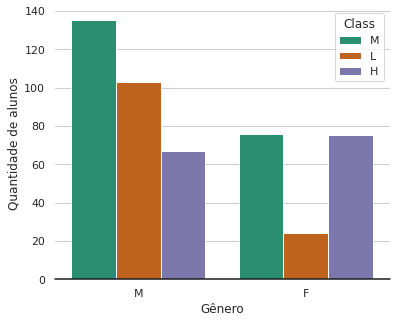

Apesar do conjunto de dados ser composto em sua maioria por pessoas do sexo masculino quando é feita uma avaliação do nível de escolaridade por gênero temos que mais mulheres são classificadas como High-level.

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
ax = sns.countplot(x='gender', data = df, hue='Class',palette='Dark2')
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.xlabel("Gênero")
plt.ylabel("Quantidade de alunos")
plt.show()
display(Markdown("Apesar do conjunto de dados ser composto em sua maioria por pessoas do sexo masculino quando é feita uma avaliação do nível de escolaridade por gênero temos que mais mulheres são classificadas como High-level."))

Quais países tem alunos com melhor desempenho?

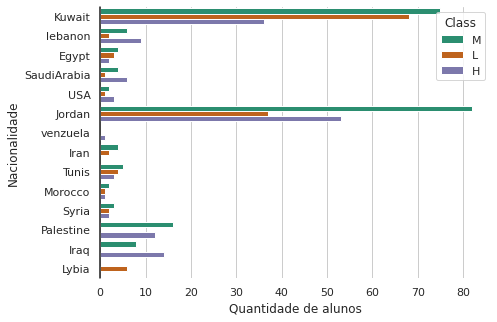

Jordan é o pais com o maior número de pessoas classificadas como High-level.

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
ax = sns.countplot(y='NationalITy', data = df, hue='Class',palette='Dark2')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.xlabel("Quantidade de alunos")
plt.ylabel("Nacionalidade")
plt.show()
display(Markdown("Jordan é o pais com o maior número de pessoas classificadas como High-level."))

Como estão distribuido os alunos por gênero nos países? 

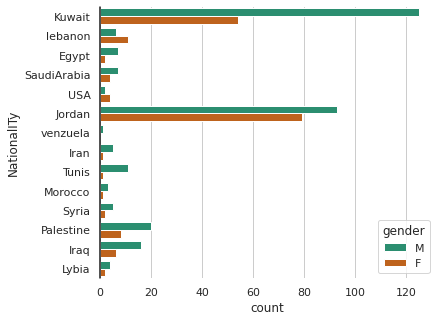

Observando a relação da distribuição de gênero por país percebemos que Jordan além de ser o país que possue mais pessoas com classificação High também é o pais que possuem o maior número de mulheres, evidenciando o fato das mulheres terem obtido uma melhor classificação.

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
ax = sns.countplot(
    y='NationalITy',
    data = df,
    hue='gender',
    palette='Dark2'
)
ax.set(frame_on=False)
ax.axvline(0,
           color="k",
           clip_on=False
          )
plt.show()
display(Markdown("Observando a relação da distribuição de gênero por país percebemos que Jordan além de ser o país que possue mais pessoas com classificação High também é o pais que possuem o maior número de mulheres, evidenciando o fato das mulheres terem obtido uma melhor classificação."))

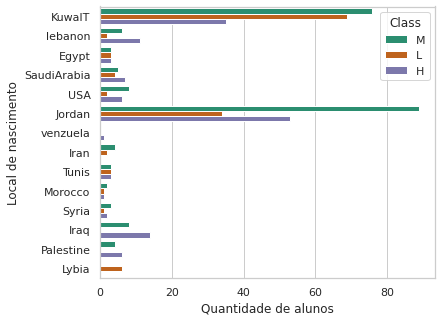

Acima nós vemos a distribuição da nacionalidade dos estudantes com relação as suas notas. Percebemos que Jordan tem melhor desempenho com relação aos demais

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
sns.countplot(y='PlaceofBirth', data = df, hue='Class',palette='Dark2')
plt.xlabel("Quantidade de alunos")
plt.ylabel("Local de nascimento")
plt.show()
display(Markdown("Acima nós vemos a distribuição da nacionalidade dos estudantes com relação as suas notas. Percebemos que Jordan tem melhor desempenho com relação aos demais"))

Tem alguma relação entre o desempenho do aluno e seu nível educacional?

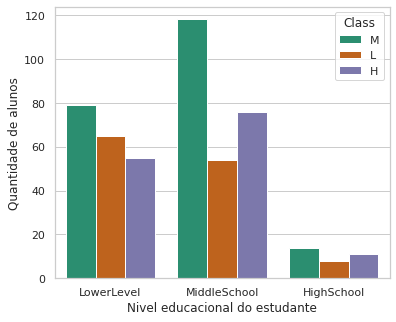

Neste gráfico nós vemos a distribuição das notas dos alunos com relação ao seus nível escolar

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
sns.countplot(x='StageID', data = df, hue='Class',palette='Dark2')
plt.xlabel("Nivel educacional do estudante")
plt.ylabel("Quantidade de alunos")
plt.show()
display(Markdown("Neste gráfico nós vemos a distribuição das notas dos alunos com relação ao seus nível escolar"))

A turma que o aluno está tem alguma relação com seu desempenho?

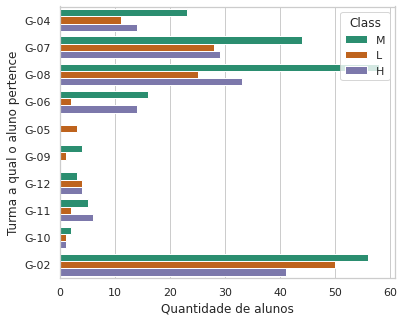

Acima nós temos um gráfico representando a disposição das turmas e as notas do estudantes.

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
sns.countplot(y='GradeID', data = df, hue='Class',palette='Dark2')
plt.xlabel("Quantidade de alunos")
plt.ylabel("Turma a qual o aluno pertence")
plt.show()
display(Markdown("Acima nós temos um gráfico representando a disposição das turmas e as notas do estudantes."))

O desempenho do aluno tem alguma relação com sua sala de aula?

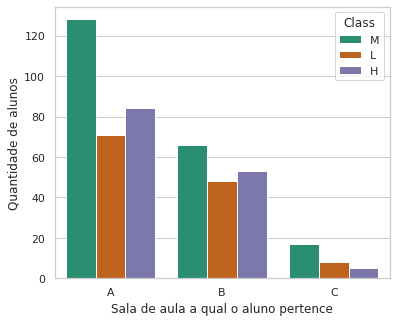

Acima nós temos um gráfico representando a disposição das salas de aula e as notas do estudantes

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
sns.countplot(x='SectionID', data = df, hue='Class',palette='Dark2')
plt.xlabel("Sala de aula a qual o aluno pertence")
plt.ylabel("Quantidade de alunos")
plt.show()
display(Markdown("Acima nós temos um gráfico representando a disposição das salas de aula e as notas do estudantes"))

O curso que o estudante escolheu tem alguma relevância para seu desempenho?

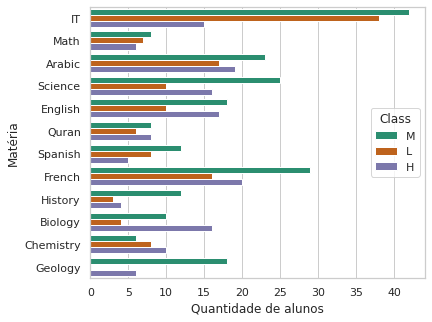

Acima vemos a distribuição das matérias dos alunos pelo seus desempenhos. Observamos que as matérias de biologia e história são menos comuns de receber notas baixas.

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
sns.countplot(y='Topic', data = df, hue='Class',palette='Dark2')
plt.xlabel("Quantidade de alunos")
plt.ylabel("Matéria")
plt.show()
display(Markdown("Acima vemos a distribuição das matérias dos alunos pelo seus desempenhos. Observamos que as matérias de biologia e história são menos comuns de receber notas baixas."))

O semestre letivo do aluno tem influência em seu desempenho?

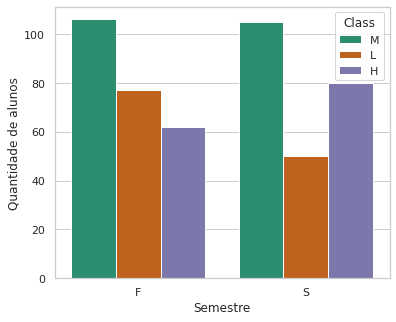

No gráfico de semestre/classe, vemos que o segundo semestre tem uma quantidade maior de alunos com alto desempenho do que em relação ao primeiro.

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
sns.countplot(x='Semester', data = df, hue='Class',palette='Dark2')
plt.xlabel("Semestre")
plt.ylabel("Quantidade de alunos")
plt.show()
display(Markdown("No gráfico de semestre/classe, vemos que o segundo semestre tem uma quantidade maior de alunos com alto desempenho do que em relação ao primeiro."))

O desempenho do aluno é influenciado pelo seu responsável?

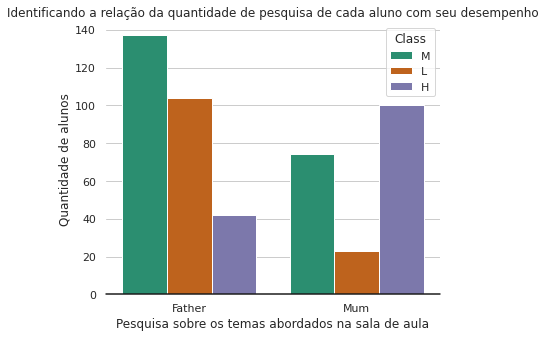

Possuir um acompanhamento feito pelo pai apresenta uma relação positiva para alunos classificados como Low e Middle, já para alunos classificados como High apresentaram um melhor desempenho aqueles que possuem sua representação feita pela mãe.

In [16]:
#completo
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.countplot(x='Relation', data=df, hue='Class',palette='Dark2')
plt.xlabel('Pesquisa sobre os temas abordados na sala de aula')
plt.ylabel('Quantidade de alunos')
plt.title('Identificando a relação da quantidade de pesquisa de cada aluno com seu desempenho', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

display(Markdown("Possuir um acompanhamento feito pelo pai apresenta uma relação positiva para alunos classificados como Low e Middle, já para alunos classificados como High apresentaram um melhor desempenho aqueles que possuem sua representação feita pela mãe."))

Qual o parente responsável mais comum no nível educacional dos estudantes?

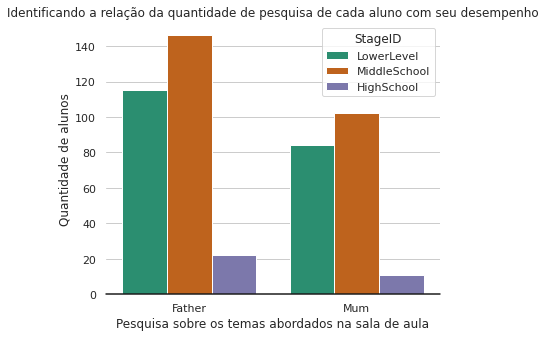

Em todos os níveis temos mais alunos representados pelo pai que pela mãe.

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.countplot(x='Relation', data=df, hue='StageID',palette='Dark2')
plt.xlabel('Pesquisa sobre os temas abordados na sala de aula')
plt.ylabel('Quantidade de alunos')
plt.title('Identificando a relação da quantidade de pesquisa de cada aluno com seu desempenho', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()
display(Markdown("Em todos os níveis temos mais alunos representados pelo pai que pela mãe."))

O aluno tirar dúvidas durante a aula influência seu aprendizado?

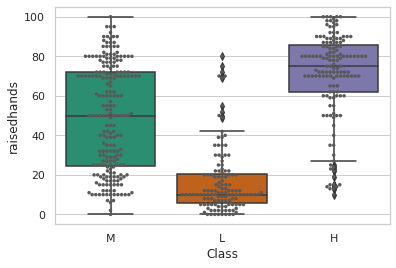

Vemos no gráfico acima que é mais comum alunos que levantam as mãos para tirar dúvidas possuem resultados melhores, enquanto os alunos de baixos rendimentos fazem isso com menos frequencia

In [18]:
Vis_res = sns.boxplot(x="Class", y="raisedhands", data=df,palette='Dark2')
Vis_res = sns.swarmplot(x="Class", y="raisedhands", data=df, color=".35", s=3.5)
plt.show()
display(Markdown("Vemos no gráfico acima que é mais comum alunos que levantam as mãos para tirar dúvidas possuem resultados melhores, enquanto os alunos de baixos rendimentos fazem isso com menos frequencia"))

O número de verdes que o estudante pesquisa o conteúdo de sala está relacionado com seu desempenho?

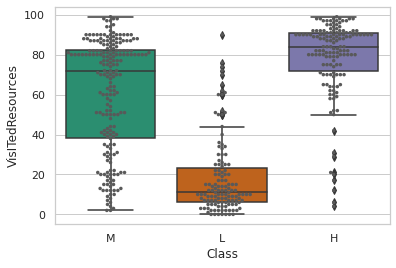

Vemos que é mais comum estudadente com bons desempenhos pesquisarem sobre os conteudos das aulas, enquanto os alunos de notas baixas fazem isso com bem menos frequencia

In [19]:
Vis_res = sns.boxplot(x="Class", y="VisITedResources", data=df,palette='Dark2')
Vis_res = sns.swarmplot(x="Class", y="VisITedResources", data=df, color=".35", s=3.5)
plt.show()
display(Markdown("Vemos que é mais comum estudadente com bons desempenhos pesquisarem sobre os conteudos das aulas, enquanto os alunos de notas baixas fazem isso com bem menos frequencia"))

O desempenho do aluno é influenciado pela quantidade de vezes que o estudante vê novidades sobre o curso?

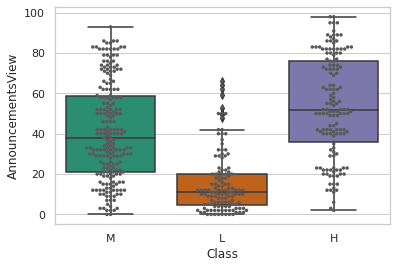

Neste gráfico vemos que os alunos com baxio desempenho raramente verifica as novidades do curso, enquanto os demais alunos estão mais bem distribuídos.

In [20]:
Anounce_bp = sns.boxplot(x="Class", y="AnnouncementsView", data=df,palette='Dark2')
Anounce_bp = sns.swarmplot(x="Class", y="AnnouncementsView", data=df, color=".35", s=3.5)
plt.show()
display(Markdown("Neste gráfico vemos que os alunos com baxio desempenho raramente verifica as novidades do curso, enquanto os demais alunos estão mais bem distribuídos."))

Participar de grupos de discussões influência em melhores rendimentos?

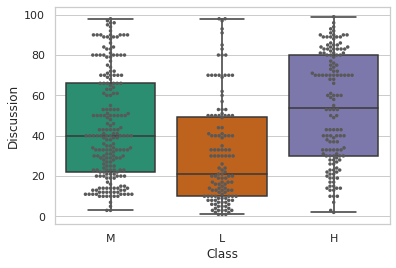

In [21]:
ax = sns.boxplot(x="Class", y="Discussion", data=df,palette='Dark2')
ax = sns.swarmplot(x="Class", y="Discussion", data=df, color=".35", s=3.5)
plt.show()

Qual a relação do responsável ter respondido a pesquisa com o desempenho do aluno?

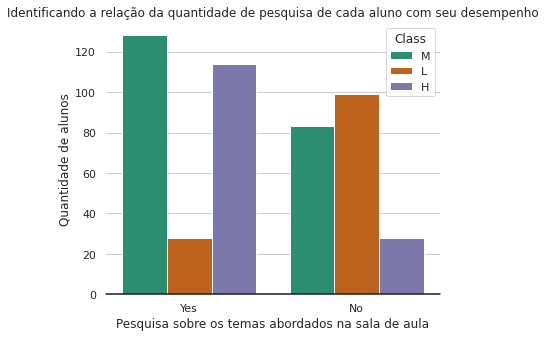

O gráfico denota uma indice de aprovação maior para alunos das turmas middle e high quando estes possuem o habito de pesquisar sobre temas abordados em sala de aula.

In [22]:
#completo
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class',palette='Dark2')
plt.xlabel('Pesquisa sobre os temas abordados na sala de aula')
plt.ylabel('Quantidade de alunos')
plt.title('Identificando a relação da quantidade de pesquisa de cada aluno com seu desempenho', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

display(Markdown("O gráfico denota uma indice de aprovação maior para alunos das turmas middle e high quando estes possuem o habito de pesquisar sobre temas abordados em sala de aula."))

O desempenho dos alunos influência a satisfação dos seus responsáveis?

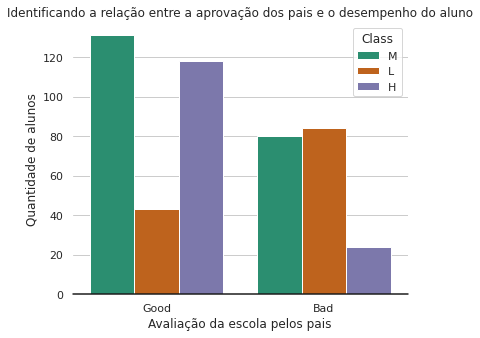

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x='ParentschoolSatisfaction', data = df, hue='Class',palette='Dark2')
plt.xlabel('Avaliação da escola pelos pais')
plt.ylabel('Quantidade de alunos')
plt.title('Identificando a relação entre a aprovação dos pais e o desempenho do aluno', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

A quantidade de faltas dos alunos tem alguma relação com notas mais baixas?

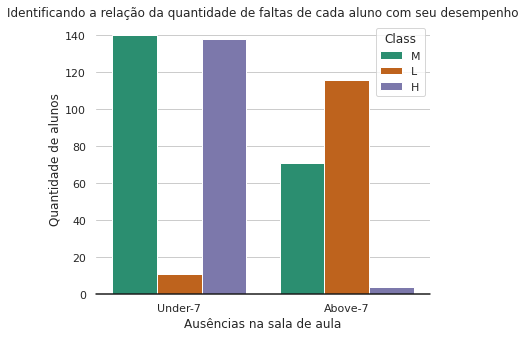

No gráfico acima nós percebemos que os alunos que tiveram menos de 7 faltas, nos níveis intermediário e avançado, acabaram tendo um desempenho melhor com relação aos alunos que tiveram mais de 7 faltas

In [24]:
#completo
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.countplot(x='StudentAbsenceDays', data=df, hue='Class',palette='Dark2')
plt.xlabel('Ausências na sala de aula')
plt.ylabel('Quantidade de alunos')
plt.title('Identificando a relação da quantidade de faltas de cada aluno com seu desempenho', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

display(Markdown("No gráfico acima nós percebemos que os alunos que tiveram menos de 7 faltas, nos níveis intermediário e avançado, acabaram tendo um desempenho melhor com relação aos alunos que tiveram mais de 7 faltas"))

A participação dos alunos influência seu desempenho?

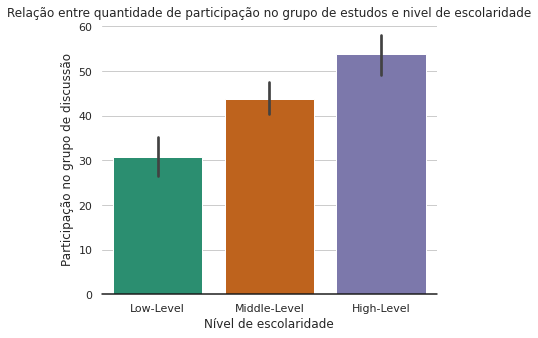

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.barplot(x='Class',y='Discussion', data=data,order=["Low-Level","Middle-Level","High-Level"],palette="Dark2")
plt.xlabel('Nível de escolaridade')
plt.ylabel('Participação no grupo de discussão')
plt.title('Relação entre quantidade de participação no grupo de estudos e nivel de escolaridade', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

Relação entre a quantidade de participação no grupo de discussão e classificação dos alunos com base em sua nota total.
Pode-se perceber no gráfico que quanto mais um aluno discute, maior é a nota dele.

Tirar dúvidas em sala faz os alunos terem melhores notas?

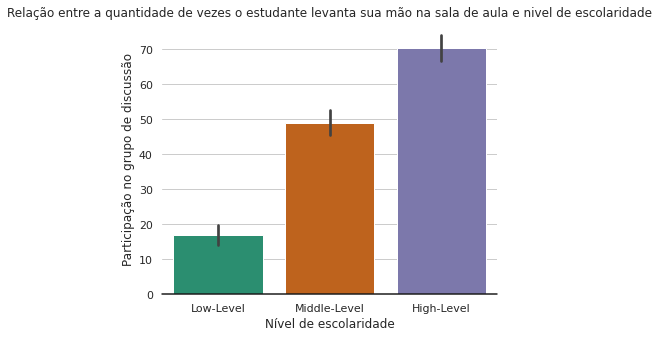

<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.barplot(x='Class',y='raisedhands', data=data,order=["Low-Level","Middle-Level","High-Level"],palette="Dark2")
plt.xlabel('Nível de escolaridade')
plt.ylabel('Participação no grupo de discussão')
plt.title('Relação entre a quantidade de vezes o estudante levanta sua mão na sala de aula e nivel de escolaridade', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()
display

Relação entre a quantidade de vezes o estudante verifica as novidades do curso e a classificação de notas.

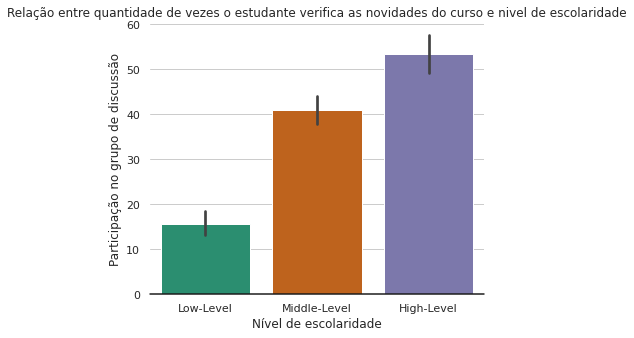

Como fica claro nos gráficos anteriores, quanto maior for a participação do aluno, ou seja, quanto maior for seu interesse, maior é a sua classificação de notas.

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

ax = sns.barplot(x='Class',y='AnnouncementsView', data=data,order=["Low-Level","Middle-Level","High-Level"],palette="Dark2")
plt.xlabel('Nível de escolaridade')
plt.ylabel('Participação no grupo de discussão')
plt.title('Relação entre quantidade de vezes o estudante verifica as novidades do curso e nivel de escolaridade', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()
display(Markdown("Como fica claro nos gráficos anteriores, quanto maior for a participação do aluno, ou seja, quanto maior for seu interesse, maior é a sua classificação de notas."))

Buscar novidades sobre o curso é algo predominante em alguma turma e qual genero se destaca com esse comportamento?

<AxesSubplot:xlabel='SectionID', ylabel='Discussion'>

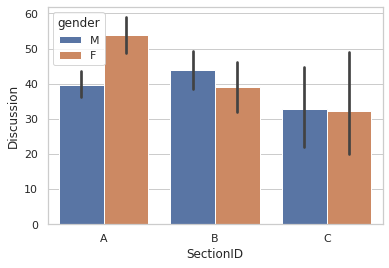

In [42]:
sns.barplot(data=df, x='SectionID', y='Discussion', hue='gender')

Qual a relação de cada gênero com sua quantidade de estudo com seus desempenhos?

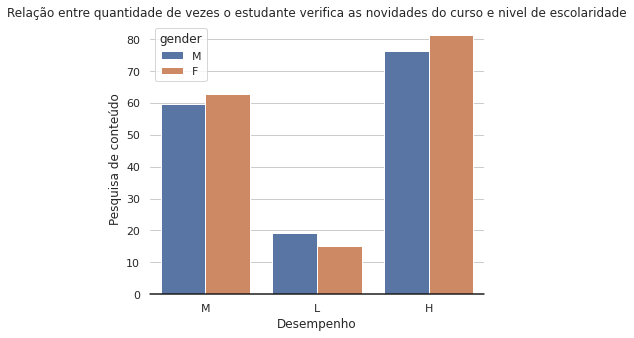

Neste gráfico é possível notar que nos classificados como Middle e High, ou seja, nos níveis mais altos as mulheres predominam por pesquisarem mais.

In [44]:
plt.figure(figsize=(6,5))
ax = sns.barplot(data=df, x='Class', y='VisITedResources', hue='gender', ci=None)
plt.xlabel('Desempenho')
plt.ylabel('Pesquisa de conteúdo')
plt.title('Relação entre quantidade de vezes o estudante verifica as novidades do curso e nivel de escolaridade', fontsize=12)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()
display(Markdown("Neste gráfico é possível notar que nos classificados como Middle e High, ou seja, nos níveis mais altos as mulheres predominam por pesquisarem mais."))

## 3. Insights

Através das visualizações e da análise dos conjuntos de dados conseguimos chegar as seguintes conclusões:

- As mulheres possuem no geral um desempenho melhor que os dos homens;
- Quando o acompanhamento dos alunos e feito pelas mães estes também tendem obter melhores resultados;
- Possuir mais de 7 faltas é um fator predominantem entre os alunos com desempenho ruim;
- Alunos que pesquisam mais sobre os assuntos em estudo tem um melhor desempenho e as mulheres costumam pesquisar mais;
- Participar da aula fazendo perguntas e de grupos de estudo ajudam a melhorar o desempenho do aluno.
